### Decision Tree Methods - In class practice

In [3]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

2. Import the bank dataset

In [5]:
bank = pd.read_csv('Datasets/Bank.csv')

In [6]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. The dependent variable is 'Personal Loan', meaning whether the customer accepts a personal loan offer or not. Take a look at its distribution.

<BarContainer object of 2 artists>

([<matplotlib.axis.XTick at 0x13baa1310>,
 [Text(0, 0, 'No loan'), Text(1, 0, 'Loan Accepted')])

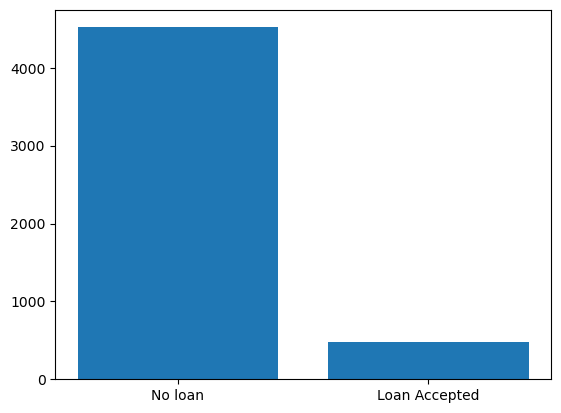

In [7]:
loan_counts = bank['Personal Loan'].value_counts().sort_index()
x = loan_counts.index
y = loan_counts.values

plt.bar(x, y)
plt.xticks([0, 1], ['No loan', 'Loan Accepted'])

4. Prepare X and y

In [8]:
y = bank['Personal Loan']
X = bank.drop(['Personal Loan', 'ID', 'ZIP Code'], axis = 1)

5. Split training and test datasets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


6. Fit a decision tree.<br>
We set the max depth to be 3 to stop the tree growing.

In [10]:
dec_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

7. Plot the tree and print the classification results.<br>
Calculate the accuracy rate and confusion matrix.

<Figure size 1200x800 with 0 Axes>

[Text(0.5, 0.875, 'Income <= 113.5\ngini = 0.17\nsamples = 4000\nvalue = [3625, 375]\nclass = No Loan'),
 Text(0.25, 0.625, 'CCAvg <= 2.95\ngini = 0.041\nsamples = 3217\nvalue = [3149, 68]\nclass = No Loan'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Income <= 106.5\ngini = 0.008\nsamples = 2974\nvalue = [2962.0, 12.0]\nclass = No Loan'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 2892\nvalue = [2892, 0]\nclass = No Loan'),
 Text(0.1875, 0.125, 'gini = 0.25\nsamples = 82\nvalue = [70, 12]\nclass = No Loan'),
 Text(0.375, 0.375, 'CD Account <= 0.5\ngini = 0.355\nsamples = 243\nvalue = [187, 56]\nclass = No Loan'),
 Text(0.3125, 0.125, 'gini = 0.306\nsamples = 223\nvalue = [181, 42]\nclass = No Loan'),
 Text(0.4375, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [6, 14]\nclass = Loan'),
 Text(0.75, 0.625, 'Education <= 1.5\ngini = 0.477\nsamples = 783\nvalue = [476, 307]\nclass = No Loan'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Family <= 2.5\ngini = 0.201\nsamples = 5

Text(0.5, 1.0, 'Decision Tree (Depth = 3)')

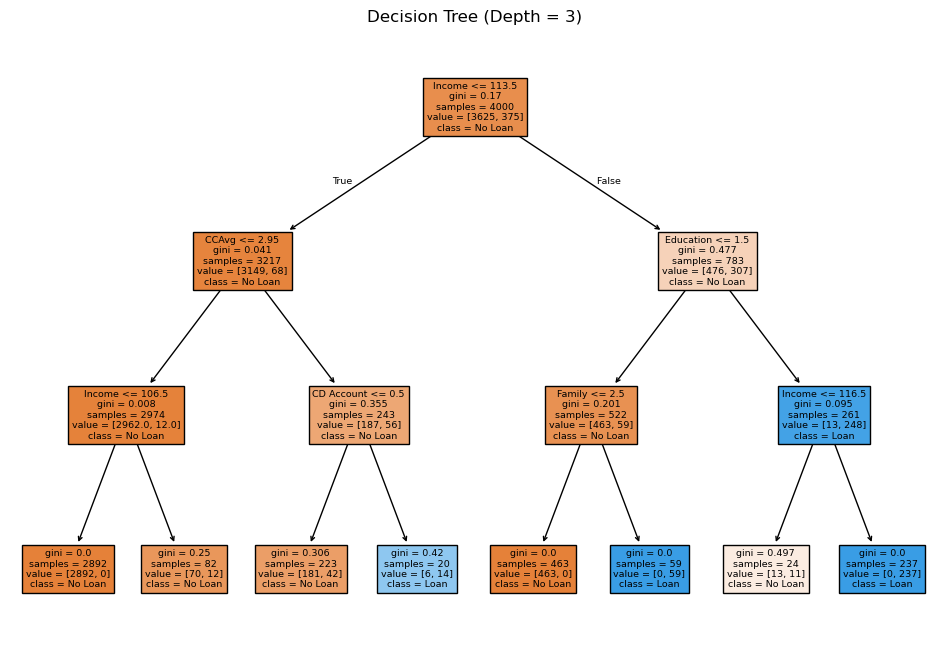

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(dec_tree, feature_names=X.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.title("Decision Tree (Depth = 3)")
plt.show()

In [12]:
# Predict on test data
y_pred = dec_tree.predict(X_test)

In [13]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.988


In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[895   0]
 [ 12  93]]


8. Next we fit a tree without specifying stopping criteria.<br>
By default, the tree will grown until there is no more information gain.<br>
Repeat Step 7 for this tree.

In [15]:
new_tree = DecisionTreeClassifier(random_state=42)
new_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<Figure size 1200x800 with 0 Axes>

[Text(0.6522352430555556, 0.9642857142857143, 'Income <= 113.5\ngini = 0.17\nsamples = 4000\nvalue = [3625, 375]\nclass = No Loan'),
 Text(0.3600260416666667, 0.8928571428571429, 'CCAvg <= 2.95\ngini = 0.041\nsamples = 3217\nvalue = [3149, 68]\nclass = No Loan'),
 Text(0.5061306423611112, 0.9285714285714286, 'True  '),
 Text(0.07118055555555555, 0.8214285714285714, 'Income <= 106.5\ngini = 0.008\nsamples = 2974\nvalue = [2962.0, 12.0]\nclass = No Loan'),
 Text(0.057291666666666664, 0.75, 'gini = 0.0\nsamples = 2892\nvalue = [2892, 0]\nclass = No Loan'),
 Text(0.08506944444444445, 0.75, 'Education <= 1.5\ngini = 0.25\nsamples = 82\nvalue = [70, 12]\nclass = No Loan'),
 Text(0.027777777777777776, 0.6785714285714286, 'Family <= 3.5\ngini = 0.1\nsamples = 38\nvalue = [36, 2]\nclass = No Loan'),
 Text(0.013888888888888888, 0.6071428571428571, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]\nclass = No Loan'),
 Text(0.041666666666666664, 0.6071428571428571, 'gini = 0.0\nsamples = 2\nvalue = [0, 2

Text(0.5, 1.0, 'New Decision Tree')

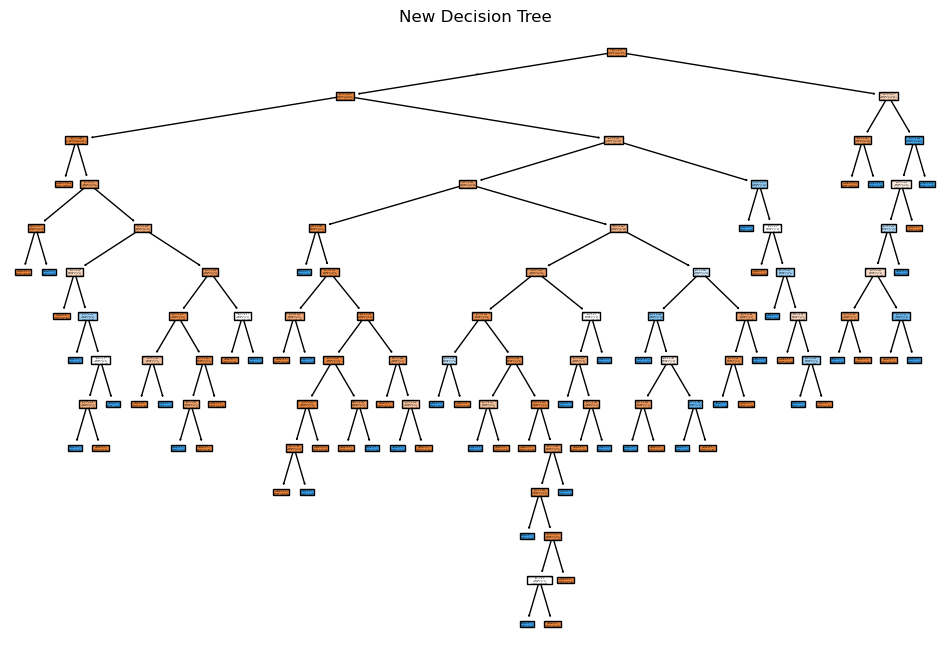

In [16]:
plt.figure(figsize=(12, 8))
plot_tree(new_tree, feature_names=X.columns, class_names=['No Loan', 'Loan'], filled=True)
plt.title("New Decision Tree")
plt.show()

In [17]:
# Predict on test data
y_pred = new_tree.predict(X_test)

In [18]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.988


In [19]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[890   5]
 [  7  98]]


9. Bagging, random forest and boosting. Repeat Step 7 for all methods.

9.1 Bagging

9.2 Random forest

9.3 Plot the importance of each variable based on the random forest results.

9.4 Boosting. Try manipulate the three parameters to generate three boosting trees. Compare the results.